# Now genomic selection?

Complex traits are controlled by many small-effect genes. I.e. lets say we only want to optimise for yield.

How do we select for so many genes simulateously, while each gene only contributes a tiny %?

https://www.youtube.com/watch?v=G5lOEbv0Yg4&t=423s

https://www.youtube.com/watch?v=oAoRcgffCjk&t=970s


In [1]:
import os
from pathlib import Path
print(f'Changing to {Path().resolve().parent}')
os.chdir(Path().resolve().parent)

Changing to /home/bnoordijk/vscode_projects/EduXR_minor


In [2]:
from dsplantbreeding.Population import get_agricultural_population, get_natural_population, get_resilient_population
from dsplantbreeding.actions import perform_cross_between

In [8]:
natural_population = get_natural_population()
natural_population.show_phenotypes()


    Salt Resistance      Yield
0          1.979529  11.252110
1          2.047894   6.842067
2         -0.051944  11.977737
3         -0.055573   6.037903
4          0.196578  10.422311
5          0.139341   7.522237
6          2.009291  11.773142
7          0.028175   4.501557
8          2.076902   9.084438
9          0.124643   9.460588
10         0.100719   7.166923
11         1.870378   3.223485
12         0.027499   9.489989
13         2.022891   6.550472
14         0.135292  13.915239
15         0.088643   3.320652
16        -0.200164   5.098497
17         1.962816   7.751183
18         0.166903   6.008345
19        -0.043857  15.566357
20         1.946026  11.207297
21         2.047699   8.953895
22         2.324894  11.538624
23         1.897877   6.696056
24        -0.057709   4.363487
25         0.012412  10.678885
26         2.030261   3.742691
27         0.052377   6.236143
28         0.000094   2.428361
29         2.134381   9.102944
30        -0.071354  15.413585
31      

In [ ]:
genomic_selection_model = natural_population.fit_gs_model(target_phenotype='Yield')

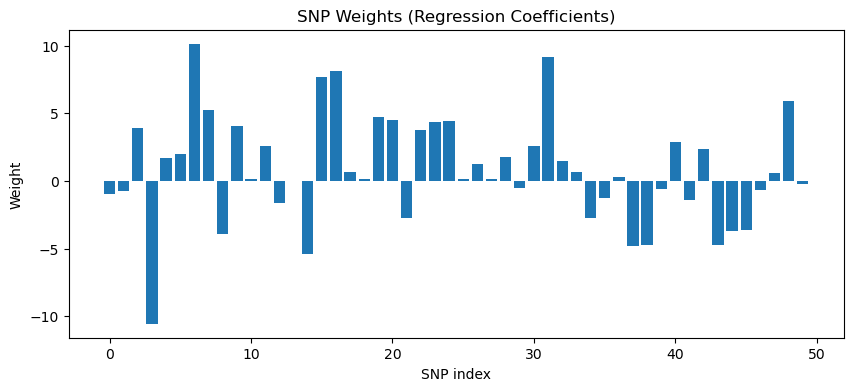

In [4]:
genomic_selection_model.show_genomic_selection_snp_weights()


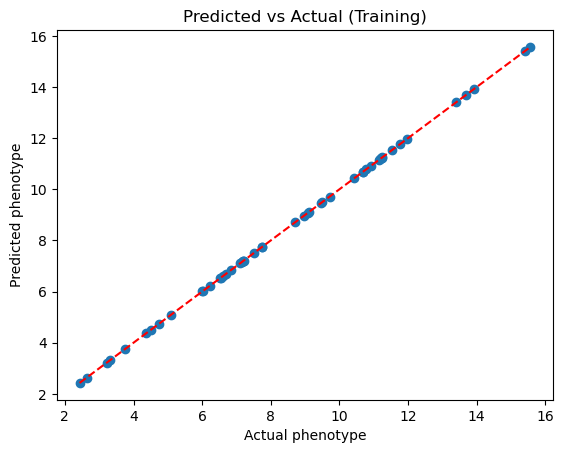

In [5]:
genomic_selection_model.predicted_vs_actual_training_population()



In [6]:
predicted_values = genomic_selection_model.predict_phenotypes(natural_population) # Also called GEBV

new_population = natural_population.select_plants_from_predicted_values(predicted_values, ntop=2)
new_population.n_plants


2

In [7]:

f1 = perform_cross_between(new_population, new_population, n_offspring=10)

f1_gebv = genomic_selection_model.predict_phenotypes(f1) # Also called GEBV

selected_f1 = f1.select_plants_from_predicted_values(f1_gebv, ntop=2)

f2 = perform_cross_between(selected_f1, selected_f1, n_offspring=10)

# Now select plants based on highest values
f2.show_phenotypes()
# This allows us to maximise for traits that are controlled by many genes.

   Salt Resistance      Yield
0        -0.020471  19.233724
1         0.047894  16.590382
2        -0.051944  20.761968
3        -0.055573  14.603843
4         0.196578  19.387915
5         0.139341  17.505275
6         0.009291  16.150488
7         0.028175  19.075965
8         0.076902  15.834983
9         0.124643  19.452620
